In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# Load model

In [7]:
from models import loan_model

# load model
def model_prediction(x):
    return loan_model.predict(x)

def model_prediction_simple(x):
    return loan_model.simple_predict(x)

def model_classes():
    return loan_model.classes()

X = loan_model.get_data()

# Skater (analyze model)

## Feature importance

In [8]:
from src import feature_importance

features = feature_importance.get_features(model_prediction, X[1])
print("Feature Importance (predict_proba)")
print(features)

AttributeError: module 'src.feature_importance' has no attribute 'get_features'

#### Using 'predict'

In [9]:
features_2 = feature_importance.get_features_2(model_prediction, X[0], model_classes)
print("Feature Importance (predict)")
features_2

AttributeError: module 'src.feature_importance' has no attribute 'get_features_2'

## partial dependence 


2019-05-07 10:11:02,158 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[29/29] grid cells ████████████████████ Time elapsed: 0 seconds

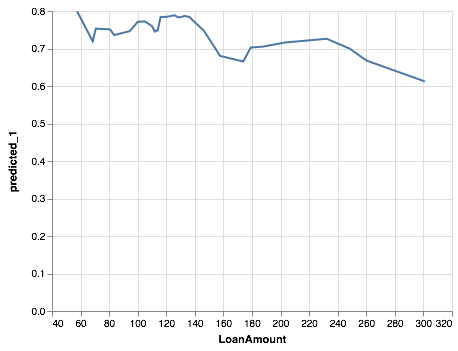

In [10]:
# partial_dependence = interpreter.partial_dependence.partial_dependence(['LoanAmount'], skater_model, grid_resolution=30)
from src import partial_dependence
dependency = partial_dependence.get_dependency(model_prediction, X[1], ['LoanAmount'])
alt.Chart(dependency).mark_line().encode(
    x='LoanAmount',
    y='predicted_1'
)

2019-05-07 10:11:03,123 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[30/30] grid cells ████████████████████ Time elapsed: 0 seconds

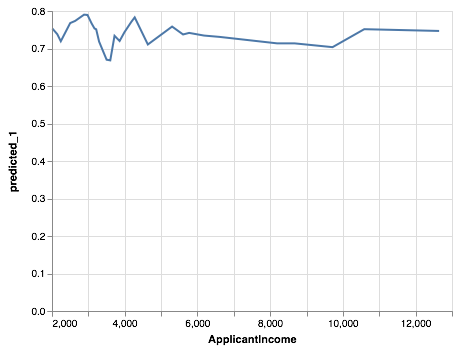

In [11]:
dependency = partial_dependence.get_dependency(model_prediction, X[1], ['ApplicantIncome'])
alt.Chart(dependency).mark_line().encode(
    x='ApplicantIncome',
    y='predicted_1'
)

2019-05-07 10:11:04,093 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[100/100] grid cells ████████████████████ Time elapsed: 2 seconds

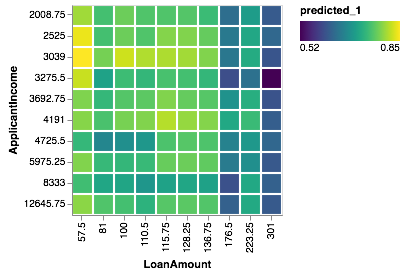

In [12]:
dependency = partial_dependence.get_dependency(model_prediction, 
                                               X[1], 
                                               ['LoanAmount', 'ApplicantIncome'],
                                               resolution=10)

alt.Chart(dependency).mark_rect().encode(
    x='LoanAmount:O',
    y='ApplicantIncome:O',
    color='predicted_1:Q'
)

### TreeSurrogates (Experimental)

In [13]:
# help(interpreter.tree_surrogate)

## Contrastive explanation
Based on https://arxiv.org/pdf/1806.07470.pdf and https://github.com/MarcelRobeer/ContrastiveExplanation

In [14]:
# from IPython.core.debugger import set_trace
import src.contrastive_explanation as ce

# dm = ce.domain_mappers.DomainMapperTabular(X[0].values, 
#                                            feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Urban', 'Rural'],
#                                            categorical_features=[0, 1, 2, 3, 4, 9, 10, 11])
# print(loan_model.features_list())
dm = ce.domain_mappers.DomainMapperTabular(X[0].values, 
                                           feature_names = loan_model.features(),
                                           categorical_features = loan_model.categoricals())

# exp = ce.ContrastiveExplanation(dm, verbose=True)
exp = ce.ContrastiveExplanation(dm)

In [19]:
import random
num_of_examples = 3

for i in range(num_of_examples):
    idx = random.randrange(len(X[1]))
    number_of_explanations = 1

    sample = X[1].values[idx]
    print("Sample #", idx + 1)
    print(exp.explain_instance_domain(loan_model.predict, sample))
    print('--------------------')

Sample # 50
The model predicted '0' instead of '1' because 'Loan_Amount_Term <= 395.774'
--------------------
Sample # 77
The model predicted '1' instead of '0' because 'LoanAmount > 4.695'
--------------------
Sample # 50
The model predicted '0' instead of '1' because 'not Credit_History and ApplicantIncome > 2977.76 and LoanAmount > 64.407'
--------------------
